# Task A - NOT 

In [72]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [73]:
x_train = torch.FloatTensor([[0.0], [1.0]])
y_train = torch.FloatTensor([[1.0], [0.0]])

In [74]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def logits(self, x): 
        return self.linear(x)

    def forward(self, x):
        return torch.sigmoid(self.logits(x))
    
    def loss(self, x, y): 
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [75]:
model = Model(1, 1)

In [76]:
learning_rate = 0.015
epochs = 40000

In [77]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [78]:
loss = 0 
losses = []

In [79]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = model.loss(x_train, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph

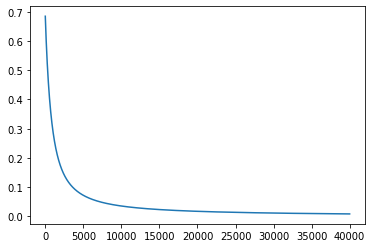

In [80]:
plt.plot(range(epochs), losses)

## Optimization result

In [81]:
W = model.linear.weight.item()
b = model.linear.bias.item()

print(f'W: {W}, b: {b}, loss: {loss}')

W: -9.550373077392578, b: 4.570364475250244, loss: 0.00857592187821865


## Optimization graph

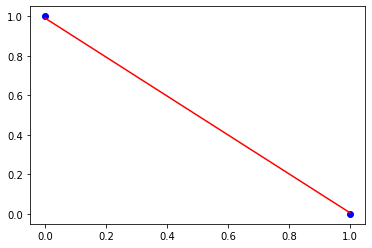

In [83]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.forward(x_train).detach(), 'r')